In [1]:
import pandas as pd 
import numpy as np  

import matplotlib.pyplot as plt 
import seaborn as sns 

import sqlite3 as sql 
import requests
import csv 
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

# Elo rating

- The World Football Elo Ratings are a ranking system for men's national association football teams that is published by the website eloratings.net. It is based on the Elo rating system but includes modifications to take various football-specific variables into account, like the margin of victory, importance of a match, and home field advantage. Other implementations of the Elo rating system are possible and there is no single nor any official Elo ranking for football teams. (https://en.wikipedia.org/wiki/World_Football_Elo_Ratings#cite_note-Laesk_et._al.-1)
- Since being developed, the Elo rankings have been found to have the highest predictive capability for football matches. (J. Lasek, Z. Szlávik and S. Bhulai (2013), The predictive power of ranking systems in association football, Archived 26 July 2014 at the Wayback Machine, Int. J. Applied Pattern Recognition1: 27–46.)
- The Elo system with a few modifications (home field advantage, goal difference, inter-league adjustments) is used to determine the club's Elo values. 
- So let's use the Elo rating for soccer club to predict the match results.

## 1. Get the Elo rating data

- Let's get the Elo rating information by the API request from the ClubELO website. (http://clubelo.com/API)
- Since we want to know the Elo rating before every match date, we request the Elo rating of the day before every match date.

In [4]:
df_match_basic = pd.read_csv("../data/df_match_basic.csv")

In [5]:
df_team = pd.read_csv("../data/df_team.csv")

In [6]:
elo_target_date = (pd.to_datetime(df_match_basic.match_date.unique()) - timedelta(days = 1)).strftime("%Y-%m-%d")

In [7]:
elo_rating = pd.DataFrame(columns = ["Rank", "Club", "Country", "Level", "Elo", "From", "To", "elo_target_date", "match_date"])

In [8]:
for target_date in elo_target_date:
    api_url = f"http://api.clubelo.com/{target_date}"
    
    response = requests.get(api_url)
    decoded_content = response.content.decode("utf-8")
    cr = csv.reader(decoded_content.splitlines(), delimiter = ",")
    
    my_list = list(cr)
    
    target_date_elo_rating = pd.DataFrame(my_list[1:], columns = my_list[0])
    target_date_elo_rating["elo_target_date"] = target_date
    target_date_elo_rating["match_date"] = (pd.to_datetime(target_date) + timedelta(days = 1)).strftime("%Y-%m-%d")
    
    elo_rating = pd.concat([elo_rating, target_date_elo_rating])

In [9]:
elo_rating = elo_rating[~elo_rating.Club.isna()]

- Since team names from the elo rating are different with our data's club names, let's match the club names.

In [10]:
## England Premier League

elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Arsenal"), "team_api_id"] = 9825
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Aston Villa"), "team_api_id"] = 10252
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Birmingham"), "team_api_id"] = 8658
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Blackburn"), "team_api_id"] = 8655
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Blackpool"), "team_api_id"] = 8483
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Bolton"), "team_api_id"] = 8559
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Bournemouth"), "team_api_id"] = 8678
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Burnley"), "team_api_id"] = 8191
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Cardiff"), "team_api_id"] = 8344
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Chelsea"), "team_api_id"] = 8455
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Crystal Palace"), "team_api_id"] = 9826
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Everton"), "team_api_id"] = 8668
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Fulham"), "team_api_id"] = 9879
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Hull"), "team_api_id"] = 8667
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Leicester"), "team_api_id"] = 8197
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Liverpool"), "team_api_id"] = 8650
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Man City"), "team_api_id"] = 8456
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Man United"), "team_api_id"] = 10260
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Middlesbrough"), "team_api_id"] = 8549
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Newcastle"), "team_api_id"] = 10261
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Norwich"), "team_api_id"] = 9850
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Portsmouth"), "team_api_id"] = 8462
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "QPR"), "team_api_id"] = 10172
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Reading"), "team_api_id"] = 9798
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Southampton"), "team_api_id"] = 8466
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Stoke"), "team_api_id"] = 10194
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Sunderland"), "team_api_id"] = 8472
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Swansea"), "team_api_id"] = 10003
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Tottenham"), "team_api_id"] = 8586
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Watford"), "team_api_id"] = 9817
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "West Brom"), "team_api_id"] = 8659
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "West Ham"), "team_api_id"] = 8654
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Wigan"), "team_api_id"] = 8528
elo_rating.loc[(elo_rating.Country == "ENG") & (elo_rating.Club == "Wolves"), "team_api_id"] = 8602

In [11]:
## Germany 1. Bundesliga

elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Koeln"), "team_api_id"] = 8722
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Nuernberg"), "team_api_id"] = 8165
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Mainz"), "team_api_id"] = 9905
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Leverkusen"), "team_api_id"] = 8178
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Dortmund"), "team_api_id"] = 9789
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Bielefeld"), "team_api_id"] = 9912
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Braunschweig"), "team_api_id"] = 9776
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Frankfurt"), "team_api_id"] = 9810
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Augsburg"), "team_api_id"] = 8406
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Bayern"), "team_api_id"] = 9823
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Cottbus"), "team_api_id"] = 8398
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Ingolstadt"), "team_api_id"] = 8234
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Schalke"), "team_api_id"] = 10189
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "St Pauli"), "team_api_id"] = 8152
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Duesseldorf"), "team_api_id"] = 8194
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Hamburg"), "team_api_id"] = 9790
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Hannover"), "team_api_id"] = 9904
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Hertha"), "team_api_id"] = 8177
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Karlsruhe"), "team_api_id"] = 8295
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Freiburg"), "team_api_id"] = 8358
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Paderborn"), "team_api_id"] = 8460
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Darmstadt"), "team_api_id"] = 8262
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Werder"), "team_api_id"] = 8697
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Fuerth"), "team_api_id"] = 8357
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Hoffenheim"), "team_api_id"] = 8226
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Stuttgart"), "team_api_id"] = 10269
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Bochum"), "team_api_id"] = 9911
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Wolfsburg"), "team_api_id"] = 8721
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Gladbach"), "team_api_id"] = 9788
elo_rating.loc[(elo_rating.Country == "GER") & (elo_rating.Club == "Lautern"), "team_api_id"] = 8350

In [12]:
## Poland Ekstraklasa

elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Arka"), "team_api_id"] = 8322
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Cracovia"), "team_api_id"] = 2186
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Belchatow"), "team_api_id"] = 8569
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Gornik"), "team_api_id"] = 8019
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Jagiellonia"), "team_api_id"] = 1957
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Korona"), "team_api_id"] = 8245
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Lech"), "team_api_id"] = 2182
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Lechia"), "team_api_id"] = 8030
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Legia"), "team_api_id"] = 8673
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Odra Wodzislaw"), "team_api_id"] = 8242
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Polonia Warszawa"), "team_api_id"] = 2183
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Piast Gliwice"), "team_api_id"] = 8028
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Podbeskidzie"), "team_api_id"] = 8033
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Pogon"), "team_api_id"] = 8023
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Bytom"), "team_api_id"] = 8020
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Ruch"), "team_api_id"] = 1601
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Widzew"), "team_api_id"] = 8024
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Wisla"), "team_api_id"] = 10265
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Lubin"), "team_api_id"] = 8021
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Zawisza"), "team_api_id"] = 8027
elo_rating.loc[(elo_rating.Country == "POL") & (elo_rating.Club == "Slask"), "team_api_id"] = 8025

In [13]:
## Belgium Jupiler League

elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Beerschot AC"), "team_api_id"] = 9993
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Brugge"), "team_api_id"] = 8342
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Gent"), "team_api_id"] = 9991
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Eupen"), "team_api_id"] = 6351
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Genk"), "team_api_id"] = 9987
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Cercle Brugge"), "team_api_id"] = 9984
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Roeselare"), "team_api_id"] = 9999
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Kortrijk"), "team_api_id"] = 8571
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Mechelen"), "team_api_id"] = 8203
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Oostende"), "team_api_id"] = 8573
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Westerlo"), "team_api_id"] = 10001
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Lierse"), "team_api_id"] = 9989
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Leuven"), "team_api_id"] = 1773
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Anderlecht"), "team_api_id"] = 8635
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Mouscron"), "team_api_id"] = 9996
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Zulte Waregem"), "team_api_id"] = 10000
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "St Truiden"), "team_api_id"] = 9997
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Charleroi"), "team_api_id"] = 9986
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Lokeren"), "team_api_id"] = 9994
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Standard"), "team_api_id"] = 9985
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Beveren"), "team_api_id"] = 8475
elo_rating.loc[(elo_rating.Country == "BEL") & (elo_rating.Club == "Bergen"), "team_api_id"] = 9998

In [14]:
## Spain LIGA BBVA

elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Bilbao"), "team_api_id"] = 8315
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Atletico"), "team_api_id"] = 9906
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Osasuna"), "team_api_id"] = 8371
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Numancia"), "team_api_id"] = 8388
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Tenerife"), "team_api_id"] = 9867
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Cordoba"), "team_api_id"] = 7869
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Elche"), "team_api_id"] = 10268
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Barcelona"), "team_api_id"] = 8634
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Getafe"), "team_api_id"] = 8305
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Granada"), "team_api_id"] = 7878
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Hercules"), "team_api_id"] = 10278
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Levante"), "team_api_id"] = 8581
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Malaga"), "team_api_id"] = 9864
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Celta"), "team_api_id"] = 9910
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Depor"), "team_api_id"] = 9783
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Recreativo"), "team_api_id"] = 8479
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Espanyol"), "team_api_id"] = 8558
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Mallorca"), "team_api_id"] = 8661
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Santander"), "team_api_id"] = 8696
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Rayo Vallecano"), "team_api_id"] = 8370
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Betis"), "team_api_id"] = 8603
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Real Madrid"), "team_api_id"] = 8633
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Sociedad"), "team_api_id"] = 8560
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Gijon"), "team_api_id"] = 9869
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Valladolid"), "team_api_id"] = 10281
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Zaragoza"), "team_api_id"] = 8394
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Eibar"), "team_api_id"] = 8372
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Sevilla"), "team_api_id"] = 8302
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Almeria"), "team_api_id"] = 9865
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Las Palmas"), "team_api_id"] = 8306
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Valencia"), "team_api_id"] = 10267
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Villarreal"), "team_api_id"] = 10205
elo_rating.loc[(elo_rating.Country == "ESP") & (elo_rating.Club == "Xerez"), "team_api_id"] = 9868

In [15]:
## Netherlands Eredivisie

elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Den Haag"), "team_api_id"] = 10217
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Alkmaar"), "team_api_id"] = 10229
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Ajax"), "team_api_id"] = 8593
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "De Graafschap"), "team_api_id"] = 8526
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Excelsior"), "team_api_id"] = 10218
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Dordrecht"), "team_api_id"] = 6631
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Groningen"), "team_api_id"] = 8674
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Twente"), "team_api_id"] = 8611
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Utrecht"), "team_api_id"] = 9908
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Feyenoord"), "team_api_id"] = 10235
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Go Ahead Eagles"), "team_api_id"] = 6433
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Heracles"), "team_api_id"] = 9791
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Nijmegen"), "team_api_id"] = 8464
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Breda"), "team_api_id"] = 9761
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Zwolle"), "team_api_id"] = 6413
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "PSV"), "team_api_id"] = 8640
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Waalwijk"), "team_api_id"] = 10219
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Roda"), "team_api_id"] = 9803
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Cambuur"), "team_api_id"] = 7788
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Heerenveen"), "team_api_id"] = 10228
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Sparta Rotterdam"), "team_api_id"] = 8614
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Venlo"), "team_api_id"] = 9839
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Vitesse"), "team_api_id"] = 8277
elo_rating.loc[(elo_rating.Country == "NED") & (elo_rating.Club == "Willem II"), "team_api_id"] = 8525

In [16]:
## Portugal Liga ZON Sagres

elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Academica"), "team_api_id"] = 10215
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Boavista"), "team_api_id"] = 8613
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Nacional"), "team_api_id"] = 10214
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Belenenses"), "team_api_id"] = 9807
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Maritimo"), "team_api_id"] = 10212
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Estoril"), "team_api_id"] = 7842
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Arouca"), "team_api_id"] = 158085
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Pacos Ferreira"), "team_api_id"] = 6403
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Penafiel"), "team_api_id"] = 6547
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Porto"), "team_api_id"] = 9773
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Gil Vicente"), "team_api_id"] = 9764
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Leixoes"), "team_api_id"] = 6421
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Moreirense"), "team_api_id"] = 8348
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Naval"), "team_api_id"] = 9809
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Rio Ave"), "team_api_id"] = 7841
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Olhanense"), "team_api_id"] = 2033
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Beira Mar"), "team_api_id"] = 10211
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Braga"), "team_api_id"] = 10264
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Benfica"), "team_api_id"] = 9772
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Sporting"), "team_api_id"] = 9768
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Leiria"), "team_api_id"] = 9771
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Guimaraes"), "team_api_id"] = 7844
elo_rating.loc[(elo_rating.Country == "POR") & (elo_rating.Club == "Setubal"), "team_api_id"] = 10238

In [17]:
## Italy Serie A

elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Atalanta"), "team_api_id"] = 8524
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Bari"), "team_api_id"] = 9976
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Bologna"), "team_api_id"] = 9857
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Brescia"), "team_api_id"] = 9858
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Cagliari"), "team_api_id"] = 8529
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Carpi"), "team_api_id"] = 208931
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Catania"), "team_api_id"] = 8530
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Cesena"), "team_api_id"] = 9880
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Chievo"), "team_api_id"] = 8533
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Empoli"), "team_api_id"] = 8534
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Fiorentina"), "team_api_id"] = 8535
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Frosinone"), "team_api_id"] = 9891
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Genoa"), "team_api_id"] = 10233
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Verona"), "team_api_id"] = 9876
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Inter"), "team_api_id"] = 8636
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Juventus"), "team_api_id"] = 9885
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Lazio"), "team_api_id"] = 8543
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Lecce"), "team_api_id"] = 9888
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Livorno"), "team_api_id"] = 8537 
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Milan"), "team_api_id"] = 8564
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Napoli"), "team_api_id"] = 9875
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Novara"), "team_api_id"] = 6269
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Palermo"), "team_api_id"] = 8540
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Parma"), "team_api_id"] = 10167
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Pescara"), "team_api_id"] = 9878
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Reggina"), "team_api_id"] = 8690
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Roma"), "team_api_id"] = 8686
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Sampdoria"), "team_api_id"] = 9882
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Sassuolo"), "team_api_id"] = 7943
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Siena"), "team_api_id"] = 8551
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Torino"), "team_api_id"] = 9804
elo_rating.loc[(elo_rating.Country == "ITA") & (elo_rating.Club == "Udinese"), "team_api_id"] = 8600

In [18]:
## France Ligue 1

elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Ajaccio"), "team_api_id"] = 8576
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Arles-Avignon"), "team_api_id"] = 108893
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Auxerre"), "team_api_id"] = 8583
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Monaco"), "team_api_id"] = 9829
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Nancy"), "team_api_id"] = 8481
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Saint-Etienne"), "team_api_id"] = 9853
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Angers"), "team_api_id"] = 8121
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Dijon"), "team_api_id"] = 9836
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Troyes"), "team_api_id"] = 10242
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Guingamp"), "team_api_id"] = 9747
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Lorient"), "team_api_id"] = 8689
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Metz"), "team_api_id"] = 8550
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Nantes"), "team_api_id"] = 9830
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Sochaux"), "team_api_id"] = 9874
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Gazelec"), "team_api_id"] = 6391
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Bordeaux"), "team_api_id"] = 9827
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Grenoble"), "team_api_id"] = 9855
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Lille"), "team_api_id"] = 8639
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Le Havre"), "team_api_id"] = 9746
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Le Mans"), "team_api_id"] = 8682
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Montpellier"), "team_api_id"] = 10249
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Nice"), "team_api_id"] = 9831
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Lyon"), "team_api_id"] = 9748
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Marseille"), "team_api_id"] = 8592
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Paris SG"), "team_api_id"] = 9847
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Lens"), "team_api_id"] = 8588
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Bastia"), "team_api_id"] = 7794
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Caen"), "team_api_id"] = 7819
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Brest"), "team_api_id"] = 8521
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Rennes"), "team_api_id"] = 9851
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Reims"), "team_api_id"] = 9837
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Toulouse"), "team_api_id"] = 9941
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Boulogne"), "team_api_id"] = 4170
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Valenciennes"), "team_api_id"] = 9873
elo_rating.loc[(elo_rating.Country == "FRA") & (elo_rating.Club == "Evian TG"), "team_api_id"] = 4087

In [19]:
## Scotland Premier League

elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Aberdeen"), "team_api_id"] = 8485
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Celtic"), "team_api_id"] = 9925
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Dundee"), "team_api_id"] = 8284
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Dundee United"), "team_api_id"] = 9938
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Dunfermline"), "team_api_id"] = 8457
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Falkirk"), "team_api_id"] = 8596
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Hamilton"), "team_api_id"] = 8429
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Hearts"), "team_api_id"] = 9860
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Hibernian"), "team_api_id"] = 10251
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Inverness"), "team_api_id"] = 8066
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Kilmarnock"), "team_api_id"] = 8597
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Motherwell"), "team_api_id"] = 9927
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Partick"), "team_api_id"] = 8426
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Rangers"), "team_api_id"] = 8548
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "Ross County"), "team_api_id"] = 8649
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "St Johnstone"), "team_api_id"] = 8467
elo_rating.loc[(elo_rating.Country == "SCO") & (elo_rating.Club == "St Mirren"), "team_api_id"] = 9800

In [20]:
## Switzerland Super League

elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Aarau"), "team_api_id"] = 9930
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Basel"), "team_api_id"] = 9931
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Bellinzona"), "team_api_id"] = 6493
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Grasshoppers"), "team_api_id"] = 9956
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Lausanne"), "team_api_id"] = 7730
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Luzern"), "team_api_id"] = 10199
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Servette"), "team_api_id"] = 9777
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Sion"), "team_api_id"] = 10179
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "StGallen"), "team_api_id"] = 10190
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Thun"), "team_api_id"] = 10191
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Xamax"), "team_api_id"] = 7955
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Young Boys"), "team_api_id"] = 10192
elo_rating.loc[(elo_rating.Country == "SUI") & (elo_rating.Club == "Zuerich"), "team_api_id"] = 10243
elo_rating.loc[(elo_rating.Country == "LIE") & (elo_rating.Club == "Vaduz"), "team_api_id"] = 9824

- Save the elo_rating table.

In [29]:
elo_rating.to_csv("../data/elo_rating.csv", index = False)

- Let's calculate the home & away Elo rating difference of each match that will be used for modeling later.
- First, get home teams's Elo rating.

In [21]:
match_api_id = df_match_basic[["match_api_id", "match_date", "home_team_api_id", "away_team_api_id"]]

In [51]:
df_match_elo = match_api_id.rename(columns = {"home_team_api_id": "team_api_id"}).merge(elo_rating[["team_api_id", "match_date", "Elo"]], how = "left", on = ["team_api_id", "match_date"]).rename(columns = {"Elo": "home_elo", "team_api_id": "home_team_api_id"})

In [52]:
df_match_elo.isna().sum()

match_api_id          0
match_date            0
home_team_api_id      0
away_team_api_id      0
home_elo            269
dtype: int64

- Some home teams don't have Elo information for some match dates.
- We will impute this missing values by filling most recent Elo rating of corresponding teams.

In [36]:
target_team_id = df_match_elo[(df_match_elo.home_elo.isna())][["home_team_api_id"]].drop_duplicates()
valid_target_team_id = target_team_id[target_team_id.team_api_id.isin(df_team.team_api_id.unique())]
target_club_name = elo_rating[elo_rating.team_api_id.isin(valid_target_team_id.team_api_id)].Club.unique()

In [39]:
target_club_all_elo = pd.DataFrame(columns = ["Rank", "Club", "Country", "Level", "Elo", "From", "To"])

In [40]:
for target_club in target_club_name:
    api_url = f"http://api.clubelo.com/{target_club}"
    
    response = requests.get(api_url)
    decoded_content = response.content.decode("utf-8")
    cr = csv.reader(decoded_content.splitlines(), delimiter = ",")
    
    my_list = list(cr)
    
    target_club_elo_rating = pd.DataFrame(my_list[1:], columns = my_list[0])
    
    target_club_all_elo = pd.concat([target_club_all_elo, target_club_elo_rating])

In [42]:
target_club_all_elo = target_club_all_elo[~target_club_all_elo.Club.isna()]

In [71]:
target_club_all_elo = target_club_all_elo.merge(elo_rating[["Club", "team_api_id"]].drop_duplicates(), how = "left", on = "Club")

In [ ]:
target_df = df_match_elo[(df_match_elo.home_team_api_id.isin(valid_target_team_id.home_team_api_id)) & (df_match_elo.home_elo.isna())]

In [75]:
target_df_merged = target_df.merge(target_club_all_elo[["team_api_id", "To", "Elo"]], how = "left", left_on = "home_team_api_id", right_on = "team_api_id")

In [80]:
target_df_merged = target_df_merged[target_df_merged.match_date > target_df_merged.To]

In [85]:
imputed_elo = target_df_merged.sort_values(["home_team_api_id", "match_date", "To"]).groupby(["home_team_api_id", "match_api_id"]) \
                              .last().reset_index()[["match_api_id", "match_date", "home_team_api_id", "away_team_api_id", "Elo"]] \
                              .rename(columns = {"Elo": "home_elo"})

In [91]:
df_match_elo = pd.concat([df_match_elo[~df_match_elo.home_elo.isna()], imputed_elo])

- Now, let's get away teams's Elo rating.

In [95]:
df_match_elo = df_match_elo.rename(columns = {"away_team_api_id": "team_api_id"}).merge(elo_rating[["team_api_id", "match_date", "Elo"]], how = "left", on = ["team_api_id", "match_date"]).rename(columns = {"Elo": "away_elo", "team_api_id": "away_team_api_id"})

In [96]:
df_match_elo.isna().sum()

match_api_id          0
match_date            0
home_team_api_id      0
away_team_api_id      0
home_elo              0
away_elo            261
dtype: int64

- Some away teams don't have Elo information for some match dates.
- We will impute this missing values by filling most recent Elo rating of corresponding teams.

In [106]:
target_team_id = df_match_elo[(df_match_elo.away_elo.isna())][["away_team_api_id"]].drop_duplicates()
valid_target_team_id = target_team_id[target_team_id.away_team_api_id.isin(df_team.team_api_id.unique())]
target_club_name = elo_rating[elo_rating.team_api_id.isin(valid_target_team_id.away_team_api_id)].Club.unique()

In [108]:
target_df = df_match_elo[(df_match_elo.away_team_api_id.isin(valid_target_team_id.away_team_api_id)) & (df_match_elo.away_elo.isna())]

In [110]:
target_df_merged = target_df.merge(target_club_all_elo[["team_api_id", "To", "Elo"]], how = "left", left_on = "away_team_api_id", right_on = "team_api_id")

In [111]:
target_df_merged = target_df_merged[target_df_merged.match_date > target_df_merged.To]

In [119]:
imputed_elo = target_df_merged.sort_values(["away_team_api_id", "match_date", "To"]).groupby(["away_team_api_id", "match_api_id"]) \
                              .last().reset_index()[["match_api_id", "match_date", "home_team_api_id", "away_team_api_id", "home_elo", "Elo"]] \
                              .rename(columns = {"Elo": "away_elo"})

In [122]:
df_match_elo = pd.concat([df_match_elo[~df_match_elo.away_elo.isna()], imputed_elo])

In [124]:
df_match_elo.isna().sum()

match_api_id        0
match_date          0
home_team_api_id    0
away_team_api_id    0
home_elo            0
away_elo            0
dtype: int64

- Now, there is no missing value in the home & away teams' Elo information.

In [165]:
df_match_elo.dtypes

match_api_id         int64
match_date          object
home_team_api_id     int64
away_team_api_id     int64
home_elo            object
away_elo            object
dtype: object

- Change the data type of the Elo to the float.

In [168]:
df_match_elo["home_elo"] = df_match_elo.home_elo.astype("float")
df_match_elo["away_elo"] = df_match_elo.away_elo.astype("float")


In [169]:
df_match_elo.dtypes

match_api_id          int64
match_date           object
home_team_api_id      int64
away_team_api_id      int64
home_elo            float64
away_elo            float64
dtype: object

## 2. EDA of the Elo rating

### Q. What is the winning percentage of teams with larger Elo rating than the opponent team?

In [170]:
df_match_elo_with_result = df_match_elo.merge(df_match_basic[["match_api_id", "match_result"]], how = "left", on = "match_api_id")

In [171]:
home_bigger = df_match_elo_with_result[df_match_elo_with_result.home_elo > df_match_elo_with_result.away_elo][["match_api_id", "home_elo", "away_elo", "match_result"]]
home_bigger.loc[home_bigger.match_result == "home_win", "match_result"] = "win"
home_bigger.loc[home_bigger.match_result == "away_win", "match_result"] = "lose"

In [172]:
away_bigger = df_match_elo_with_result[df_match_elo_with_result.home_elo < df_match_elo_with_result.away_elo][["match_api_id", "home_elo", "away_elo", "match_result"]]
away_bigger.loc[away_bigger.match_result == "home_win", "match_result"] = "lose"
away_bigger.loc[away_bigger.match_result == "away_win", "match_result"] = "win"

In [173]:
bigger = pd.concat([home_bigger, away_bigger])

In [174]:
bigger.match_result.value_counts()

win     12596
lose     6518
draw     6507
Name: match_result, dtype: int64

<AxesSubplot:xlabel='match_result', ylabel='count'>

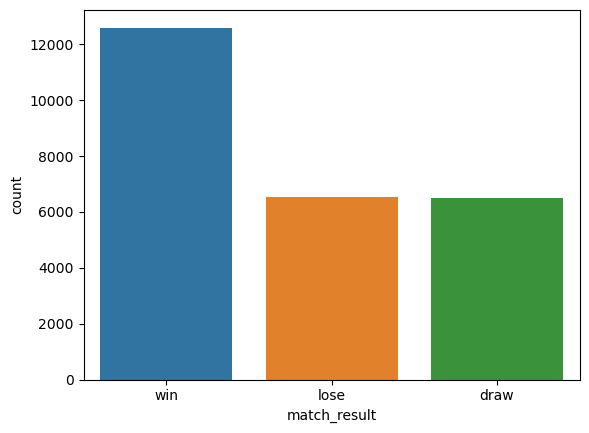

In [175]:
sns.countplot(x = bigger.match_result, order = bigger.match_result.value_counts().index)

- A team with a higher Elo rating has an about 50% chance of winning against a team with a lower Elo rating.

In [176]:
df_match_elo_with_result[df_match_elo_with_result.home_elo < df_match_elo_with_result.away_elo].match_result.value_counts()

away_win    5064
home_win    4221
draw        3492
Name: match_result, dtype: int64

Text(0.5, 1.0, "If away team's Elo > home team's Elo")

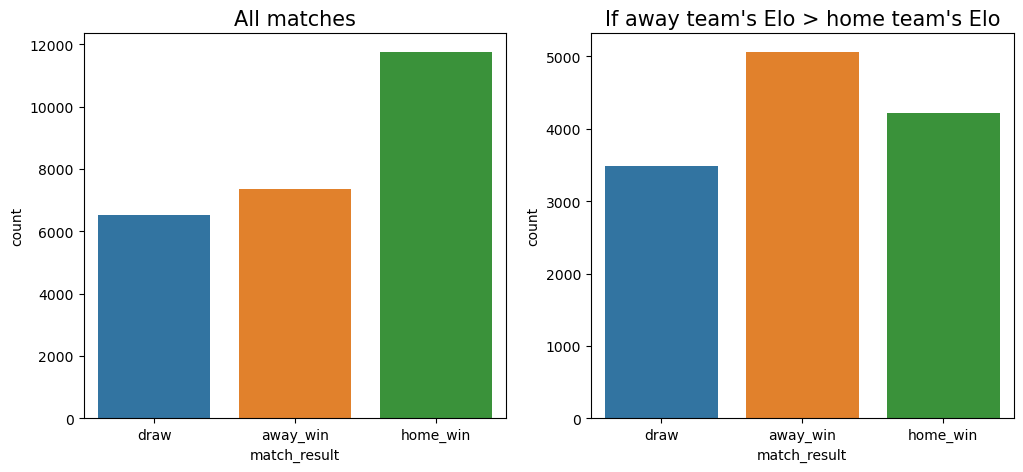

In [177]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = df_match_elo_with_result.match_result, ax = axes[0])
axes[0].set_title("All matches", fontsize = 15)

sns.countplot(x = df_match_elo_with_result[df_match_elo_with_result.home_elo < df_match_elo_with_result.away_elo].match_result, ax = axes[1])
axes[1].set_title("If away team's Elo > home team's Elo", fontsize = 15)

- If we look at the entire match without taking Elo into account, the away team wins about 30% of the time.
- However, if we only consider matches where the away team has a higher Elo, we can see that the away team has a higher win rate.
- That is, it can be seen that Elo has a greater impact on the match result than home or away.

## 3. Feature engineering for Elo rating.

- Comparing the relative Elo between the two teams is more important than the absolute Elo value of each team.
- So let's use the Elo difference between the two teams as a variable (Home team Elo - Away team Elo) rather than the Elo of the two teams.

In [189]:
df_match_elo["elo_difference"] = df_match_elo.home_elo - df_match_elo.away_elo  

- In addition, the elo at the time of the match is important, but the mid- to long-term elo can also be an important variable in determining how strong each team is.
- So, let's create variables to identify changes in each team's mid-term and long-term Elo ratings:
    - each team's last 1 / 3 / 5 / 10 / 20 / 30 / 60 / 90 matches    
        - average Elo rating
        - standard deviation of Elo rating

In [205]:
elo_rolling_info = elo_rating[["team_api_id", "match_date", "Elo"]].dropna()

In [237]:
elo_rolling_info = elo_rolling_info.sort_values(["team_api_id", "match_date"])

In [252]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    elo_rolling_info[f"avg_elo_last_{i}_matches"] = elo_rolling_info.sort_values(["team_api_id", "match_date"]) \
                                                                    .groupby("team_api_id")["Elo"].shift(1).rolling(i).mean().values
    elo_rolling_info[f"std_elo_last_{i}_matches"] = elo_rolling_info.sort_values(["team_api_id", "match_date"]) \
                                                                    .groupby("team_api_id")["Elo"].shift(1).rolling(i).std().values

In [259]:
df_match_elo = df_match_elo.merge(elo_rolling_info.drop(["Elo"], axis = 1), how = "left", left_on = ["home_team_api_id", "match_date"], right_on = ["team_api_id", "match_date"])

In [260]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    df_match_elo = df_match_elo.rename(columns = {f"avg_elo_last_{i}_matches": f"home_team_avg_elo_last_{i}_matches",
                                                  f"std_elo_last_{i}_matches": f"home_team_std_elo_last_{i}_matches"})

In [263]:
df_match_elo = df_match_elo.merge(elo_rolling_info.drop(["Elo"], axis = 1), how = "left", left_on = ["away_team_api_id", "match_date"], right_on = ["team_api_id", "match_date"])

In [264]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    df_match_elo = df_match_elo.rename(columns = {f"avg_elo_last_{i}_matches": f"away_team_avg_elo_last_{i}_matches",
                                                  f"std_elo_last_{i}_matches": f"away_team_std_elo_last_{i}_matches"})

In [268]:
df_match_elo = df_match_elo.drop(["match_date", "home_team_api_id", "away_team_api_id", "home_elo", "away_elo", "team_api_id_x", "team_api_id_y"], axis = 1)

In [270]:
df_match_elo

,match_api_id,elo_difference,home_team_avg_elo_last_1_matches,home_team_std_elo_last_1_matches,home_team_avg_elo_last_3_matches,home_team_std_elo_last_3_matches,home_team_avg_elo_last_5_matches,home_team_std_elo_last_5_matches,home_team_avg_elo_last_10_matches,home_team_std_elo_last_10_matches,home_team_avg_elo_last_20_matches,home_team_std_elo_last_20_matches,home_team_avg_elo_last_30_matches,home_team_std_elo_last_30_matches,home_team_avg_elo_last_60_matches,home_team_std_elo_last_60_matches,home_team_avg_elo_last_90_matches,home_team_std_elo_last_90_matches,away_team_avg_elo_last_1_matches,away_team_std_elo_last_1_matches,away_team_avg_elo_last_3_matches,away_team_std_elo_last_3_matches,away_team_avg_elo_last_5_matches,away_team_std_elo_last_5_matches,away_team_avg_elo_last_10_matches,away_team_std_elo_last_10_matches,away_team_avg_elo_last_20_matches,away_team_std_elo_last_20_matches,away_team_avg_elo_last_30_matches,away_team_std_elo_last_30_matches,away_team_avg_elo_last_60_matches,away_team_std_elo_last_60_matches,away_team_avg_elo_last_90_matches,away_team_std_elo_last_90_matches
0,492473,-18.743896,1443.587769,NaN,1442.109660,1.324674,1441.677710,1.107800,1444.254285,4.062424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1462.331665,NaN,1460.853556,1.324674,1460.421606,1.107800,1462.998193,4.062455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,9.583740,1383.398315,NaN,1382.943888,0.393545,1382.853003,0.304839,1386.924109,4.970817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373.814697,NaN,1373.360270,0.393545,1373.269385,0.304839,1377.340466,4.970773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,-131.862183,1467.186279,NaN,1466.731852,0.393545,1466.640967,0.304839,1470.712048,4.970773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1599.048462,NaN,1598.594035,0.393545,1598.503149,0.304839,1610.064929,14.062292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,99.138428,1471.177368,NaN,1467.407023,3.282954,1466.516626,2.622099,1468.749377,4.144453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1372.038940,NaN,1370.560832,1.324674,1370.128882,1.107800,1372.705457,4.062424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492478,-177.345459,1331.437012,NaN,1326.942546,7.784644,1322.007324,9.031994,1318.257568,7.304012,1329.887677,13.982247,1336.534269,15.118325,NaN,NaN,NaN,NaN,1508.782471,NaN,1502.902832,5.091916,1499.274072,7.513642,1496.358435,6.254508,1496.439099,4.995854,1498.021908,5.532603,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,506683,143.998901,1343.611572,NaN,1344.436035,1.428012,1345.095605,1.354731,1345.380432,1.138978,1346.061859,1.161544,1346.475037,1.112274,1346.788143,1.139500,1341.886538,7.693840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25625,506697,68.466553,1268.079224,NaN,1268.079224,0.000000,1267.240454,1.148532,1262.945789,6.402012,1257.423682,8.081155,1253.740869,8.425476,1250.267346,6.867502,1249.442734,6.745897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25626,506712,315.905884,1515.518555,NaN,1514.165568,2.343442,1513.083179,2.223184,1512.841760,1.656324,1518.017987,6.141389,1519.505819,5.653916,1523.068176,5.387709,1521.553478,7.638267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25627,506730,301.601074,1501.213745,NaN,1502.005208,1.370855,1502.638379,1.300507,1503.113257,1.001131,1500.035645,3.907609,1499.129964,5.309604,1504.506095,6.778629,1506.834241,6.466452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Save the table.

In [269]:
df_match_elo.to_csv("../data/df_match_elo.csv", index = False)

## 4. Summary

- Create the elo difference variable (Home team Elo - Away team Elo)
- Create variables to identify changes in each team's mid-term and long-term Elo ratings:
    - each team's last 1 / 3 / 5 / 10 / 20 / 30 / 60 / 90 matches    
        - average Elo rating
        - standard deviation of Elo rating

![4.summary](../images/df_match_elo.png)